#  Customer Behavior Analysis Revenue Analysis E-Commerce.

**Author:** [Sujal Maharjan]  
**Date:** [1 March 2026]  
These are the objectives and tasks that should be accomplished during the analysis:

---
The Business questions to be answered are:

1.  What is the total revenue?
2.  What are the highest revenue groups in customers?
3.  What are the best cities to live in?
4.  Who are our high value customers?
5. [?] Discounting: Does it boost revenue or cut it down?
6.  Which trends in spending behavior are in place?
7.  What then are the actions of the business?

---
## Expected Outcomes:

- Sound conceptualization of the revenue sources.
- Segmentation of high-value segments.
- Detailed, practical business suggestions.
- Return on investment of suggested programs.


In [2]:
# Importing liberies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Visualization settings 
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams['font.size'] = 10 


In [5]:
# Load the backup cleaned data 

df = pd.read_csv("../data/cleaned_ecommerece.csv")
print("Data Loaded ")
print(df.shape)

# Checking the key volumns for revenue analysis 
print("Reveunue - related columns checks::")
print()
print(f"total_spend:{df["total_spend"].dtype}")


Data Loaded 
(348, 11)
Reveunue - related columns checks::

total_spend:float64


In [6]:
# Overall revenue matrix 

total_customer = len(df)
total_revenue = df["total_spend"].sum()
average_spend = df["total_spend"].mean()
median_spend = df["total_spend"].median()
std_spend = df["total_spend"].std()

# Matrics 
print(f" Total Customers : {total_customer}")
print(f" Total revenue : {total_revenue}")
print(f" Average spend  : {average_spend}")
print(f" Median Spend : {median_spend}")
print(f" std Deviation : {std_spend}")

 Total Customers : 348
 Total revenue : 295032.0
 Average spend  : 847.7931034482758
 Median Spend : 780.2
 std Deviation : 361.69237541530856


In [9]:
# Addittional insights 

max_spend = df["total_spend"].max()
min_spend = df["total_spend"].min()
range_spend = max_spend - min_spend

print(f"Max spend is :{max_spend}")
print(f"Min spend is :{min_spend}")
print(f"Range spend is :{range_spend}")


Max spend is :1520.1
Min spend is :410.8
Range spend is :1109.3


Around Rs.1109 is spend in range 

In [ ]:
# Quartile breakdown 
q25 = df['total_spend'].quantile(0.25)
q75 = df['total_spend'].quantile(0.75)
print(f"Bottom 25% spend up to:${q25:,.2f}")
print(f"Top 25% spend above:${q75:,.2f}")
print()


Bottom 25% spend up to:Rs505.75
Top 25% spend above:Rs1,160.60



# Visualization Revenue Distribution 

Revenue distribution chart 


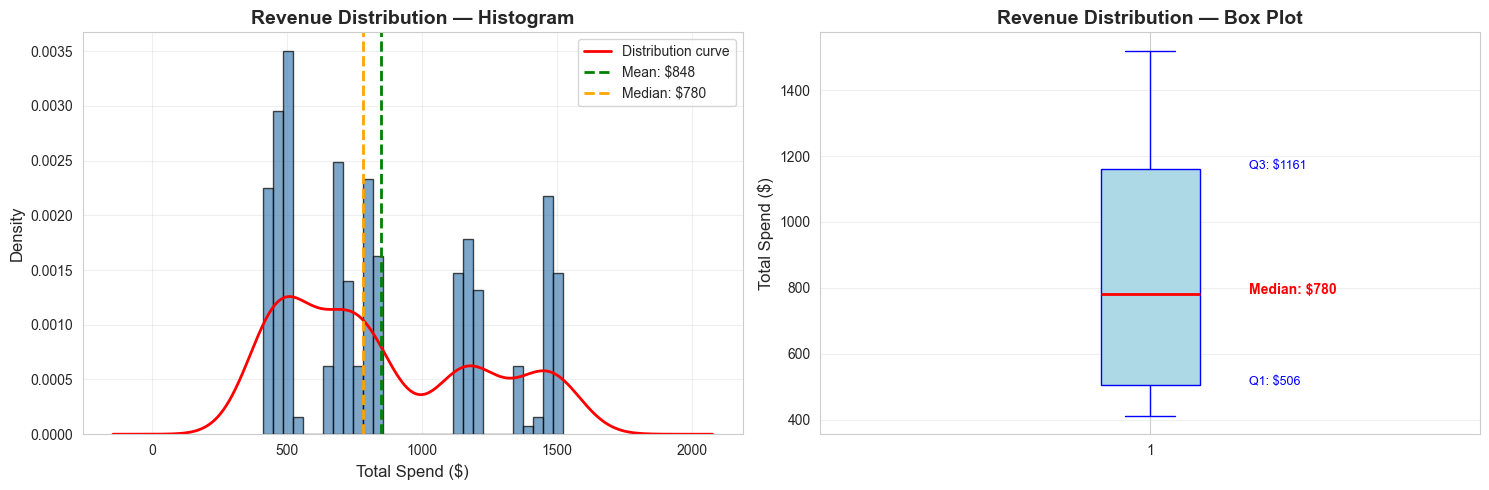

In [18]:
print("Revenue distribution chart ")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # Correct - lowercase s
axes[0].hist(df['total_spend'], bins=30, color='steelblue', 
               edgecolor='black', alpha=0.7, density=True)
# Adding a smooth curve
df['total_spend'].plot(kind='kde', ax=axes[0], color='red', 
                         linewidth=2, label='Distribution curve')
# Add mean and median lines
axes[0].axvline(average_spend, color='green', linestyle='--', 
                    linewidth=2, label=f'Mean: ${average_spend:.0f}')
axes[0].axvline(median_spend, color='orange', linestyle='--', 
                    linewidth=2, label=f'Median: ${median_spend:.0f}')

axes[0].set_title('Revenue Distribution — Histogram', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Total Spend ($)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# Right plot: Box plot
box = axes[1].boxplot(df['total_spend'], vert=True, patch_artist=True,
                         boxprops=dict(facecolor='lightblue', color='blue'),
                         medianprops=dict(color='red', linewidth=2),
                         whiskerprops=dict(color='blue'),
                         capprops=dict(color='blue'))

axes[1].set_title('Revenue Distribution — Box Plot', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Total Spend ($)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# Add statistics on the box plot
axes[1].text(1.15, median_spend, f'Median: ${median_spend:.0f}', 
               fontsize=10, color='red', fontweight='bold')
axes[1].text(1.15, q25, f'Q1: ${q25:.0f}', fontsize=9, color='blue')
axes[1].text(1.15, q75, f'Q3: ${q75:.0f}', fontsize=9, color='blue')

plt.tight_layout()
plt.savefig('../reports/figures/08_revenue_distribution.png', dpi=150, bbox_inches='tight')
plt.show()
print()